# <span style='color:Red'> Human Activity Recognition Using Smartphones  </span>

## Amartyaraj Kumar (19029)

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, StratifiedKFold

In [18]:
# read the training and test data
df1 = pd.read_csv('./project3/train_data.csv', on_bad_lines = 'skip')
df2 = pd.read_csv('./project3/test_data.csv', on_bad_lines = 'skip')
df3 = pd.read_csv('./project3/train_labels.csv', on_bad_lines = 'skip')

In [19]:
#renamimg the first column
df1.rename(columns ={"Unnamed: 0":"Serial"}, inplace= True)
df2.rename(columns ={"Unnamed: 0":"Serial"}, inplace= True)
df3.rename(columns ={"Unnamed: 0":"Serial"}, inplace= True)

In [20]:
#Preprocessing data
df_train = df1.drop(columns = ['Serial','subject']) # whole training dataset
df_labels = df3.drop(columns = ['Serial']) # whole training labels
df_train.describe() #details of our retrieved training dataset

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,...,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000,8239.000000
mean,0.274250,-0.017925,-0.108872,-0.606000,-0.507341,-0.610198,-0.631867,-0.523084,-0.611910,-0.464418,...,0.126851,-0.297094,-0.616319,0.009339,0.003152,0.013937,-0.009998,-0.501073,0.064921,-0.051133
std,0.069339,0.038559,0.054199,0.438333,0.500128,0.404329,0.413019,0.484075,0.399929,0.538403,...,0.244380,0.321153,0.310067,0.338477,0.450610,0.616504,0.483126,0.507972,0.304772,0.266842
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262406,-0.024966,-0.121234,-0.992285,-0.976372,-0.978625,-0.993140,-0.976509,-0.978540,-0.935684,...,-0.018776,-0.534129,-0.841075,-0.124766,-0.290755,-0.505017,-0.386375,-0.817873,0.004865,-0.126080
50%,0.277149,-0.017157,-0.108675,-0.940007,-0.825613,-0.844011,-0.945386,-0.835119,-0.838780,-0.870466,...,0.135731,-0.334375,-0.702503,0.009145,0.007287,0.015867,-0.009143,-0.717696,0.182040,-0.002762
75%,0.288500,-0.010548,-0.097622,-0.250242,-0.053949,-0.277286,-0.301941,-0.085257,-0.286436,-0.013838,...,0.289104,-0.109297,-0.487844,0.150718,0.294824,0.535190,0.360514,-0.523713,0.250790,0.103780
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.931308,1.000000,1.000000,0.800252,1.000000,...,1.000000,1.000000,1.000000,0.998898,1.000000,0.998341,1.000000,1.000000,1.000000,1.000000


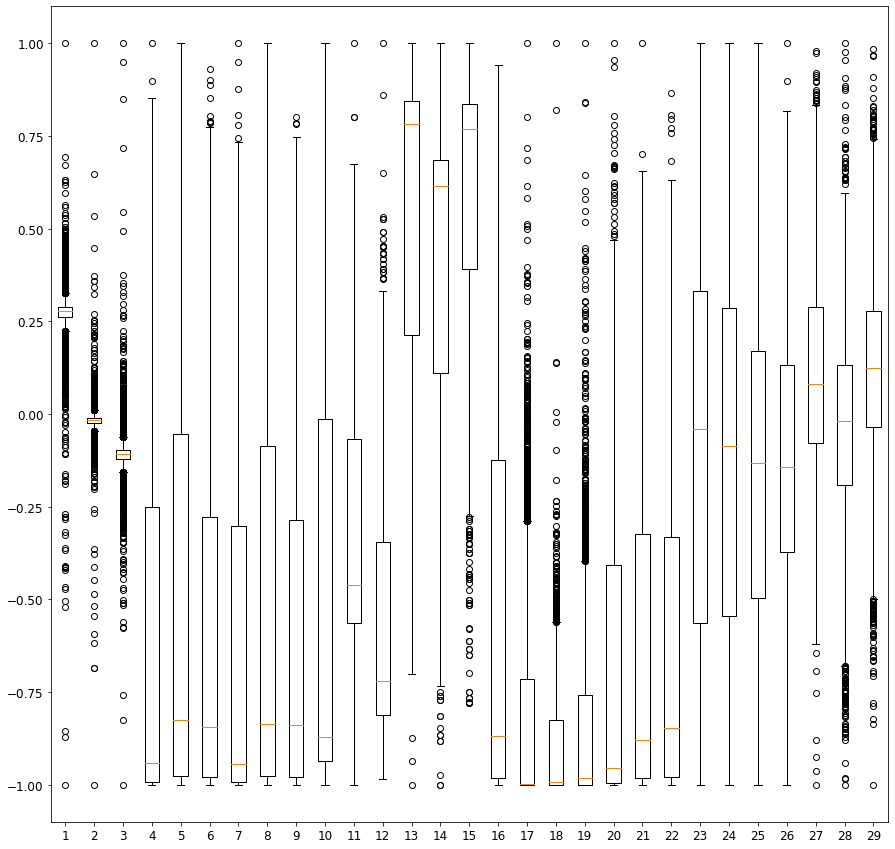

In [21]:
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 12})
plt.boxplot(df_train.iloc[:, 0:29]); # plotting 30 feature vector values

In [22]:
#Preprocessing data for visualizing each activity contribution
frames = [df_train, df_labels]
df = pd.concat(frames, axis=1)
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.286433,-0.023843,-0.122738,-0.915584,-0.710794,-0.880226,-0.932429,-0.720314,-0.881657,-0.789914,...,-0.357772,-0.752582,-0.217502,0.229826,0.154791,-0.431134,-0.761361,0.250580,-0.046895,STANDING
1,0.333258,-0.001307,-0.166581,-0.034498,-0.062471,-0.283268,-0.059698,-0.174912,-0.338661,0.283234,...,0.308324,0.048713,-0.191360,-0.580316,-0.423810,0.689597,-0.765469,0.237371,-0.067771,WALKING
2,0.266797,-0.018683,-0.101142,-0.990874,-0.989001,-0.987255,-0.991659,-0.987859,-0.985430,-0.936624,...,-0.388442,-0.703577,-0.152601,0.162091,-0.628052,0.551795,0.587768,-0.536508,-0.469193,LAYING
3,0.276363,-0.020289,-0.113701,-0.995733,-0.939094,-0.984418,-0.997013,-0.936180,-0.983728,-0.938433,...,0.054212,-0.430753,0.029986,-0.094248,0.025219,-0.408070,-0.819227,0.213794,-0.031301,STANDING
4,0.268231,-0.004146,-0.094503,0.473123,0.452403,-0.152600,0.450082,0.482764,-0.239383,0.539911,...,-0.139639,-0.558550,0.278372,0.363240,0.885432,0.848414,-0.779760,0.249384,0.035484,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,0.270511,-0.011321,-0.111377,-0.988057,-0.961229,-0.951407,-0.989752,-0.958753,-0.965050,-0.934746,...,-0.250141,-0.615815,-0.353490,-0.081501,0.181517,-0.180534,0.658690,-0.091334,0.961636,LAYING
8235,0.260897,-0.017322,-0.103011,-0.988656,-0.990926,-0.989076,-0.989816,-0.990775,-0.988472,-0.932550,...,-0.255976,-0.667159,-0.079052,-0.107393,-0.547206,0.564335,0.435081,-0.503752,-0.485656,LAYING
8236,0.278648,-0.020038,-0.118590,-0.983932,-0.912261,-0.955945,-0.987130,-0.917041,-0.957747,-0.921052,...,0.354233,0.146016,-0.068825,-0.060211,-0.727493,-0.655778,-0.795575,0.238281,-0.000787,STANDING
8237,0.283642,-0.006992,-0.129778,-0.994152,-0.954562,-0.951844,-0.995321,-0.955989,-0.944934,-0.934076,...,-0.586855,-0.881097,-0.051389,-0.015944,-0.759481,-0.805523,-0.864310,0.188362,0.044799,STANDING


## Visualizing the data in a pie chart for all six activities

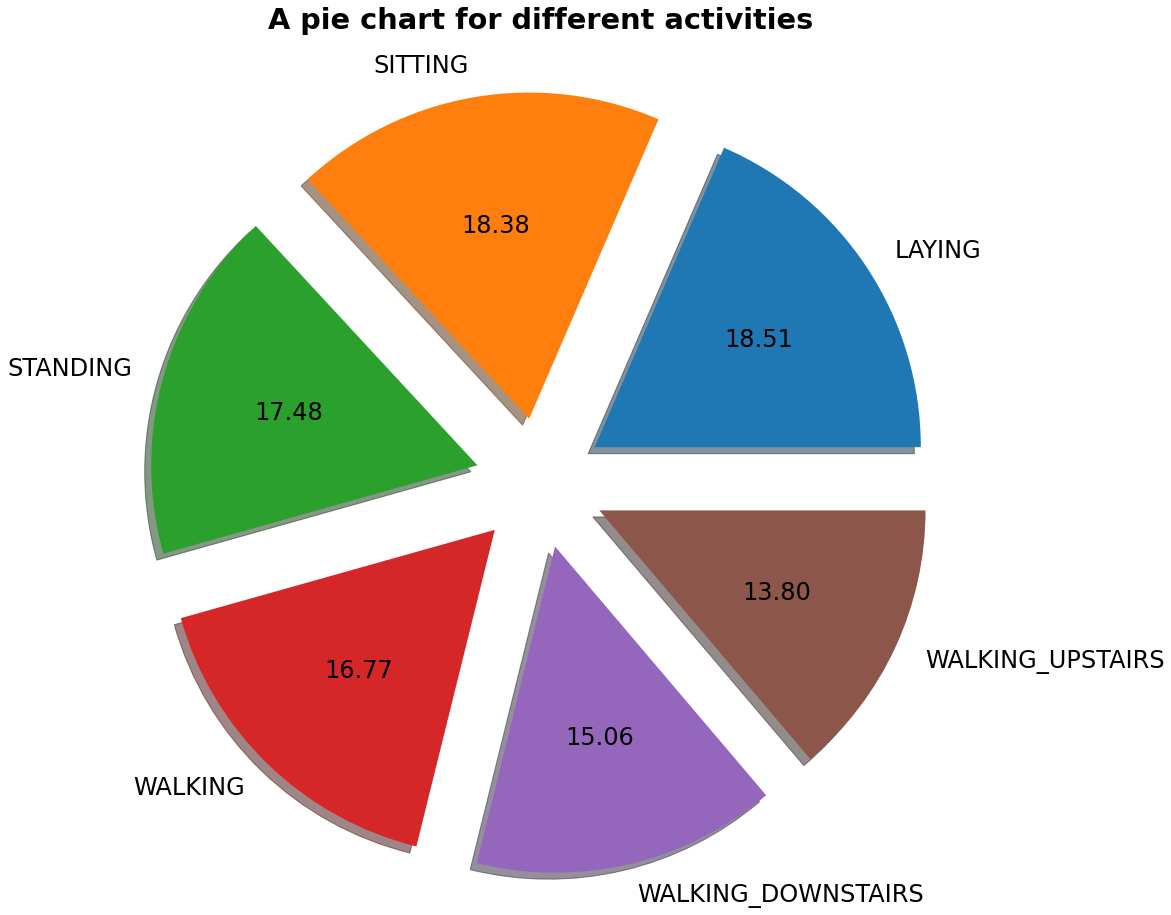

In [23]:
count_of_each_activity = np.array(df['Activity'].value_counts())
activities = sorted(df['Activity'].unique())

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities,explode=[0.2,0.2,0.2,0.2,0.2,0.2],shadow = True, autopct = '%0.2f')
plt.title("A pie chart for different activities", fontweight='bold', y = 1.05);

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaled_x = StandardScaler().fit_transform(df_train)
scaled_x =pd.DataFrame(scaled_x) #Scaled training data

from sklearn.model_selection import train_test_split
fl_train, fl_test, fl_train_label, fl_test_label = train_test_split(scaled_x, df_labels, train_size=0.75, random_state= 42, stratify = df_labels)
fl_train_label


,Activity
1784,SITTING
8147,WALKING
2680,WALKING_UPSTAIRS
2149,WALKING_UPSTAIRS
5702,WALKING_UPSTAIRS
...,...
7289,SITTING
3032,SITTING
711,WALKING
2125,SITTING


## Speedrun with selected classifiers without manual parameter selection

In [25]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(fl_train, fl_train_label.values.ravel())
prediction = clf.predict(fl_test)
accuracy_scores[0] = accuracy_score(fl_test_label, prediction)*100
print('\033[1m'+'Support Vector Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(max_iter=10000).fit(fl_train, fl_train_label.values.ravel())
prediction = clf.predict(fl_test)
accuracy_scores[1] = accuracy_score(fl_test_label, prediction)*100
print('\033[1m'+'Logistic Regression accuracy:'+'\033[0m','{}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(fl_train, fl_train_label.values.ravel())
prediction = clf.predict(fl_test)
accuracy_scores[2] = accuracy_score(fl_test_label, prediction)*100
print('\033[1m'+'K Nearest Neighbors Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[2]))

# Adaboost
clf = AdaBoostClassifier().fit(fl_train, fl_train_label.values.ravel())
prediction = clf.predict(fl_test)
accuracy_scores[3] = accuracy_score(fl_test_label, prediction)*100
print('\033[1m'+'Adaboost Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[3]))

Support Vector Classifier accuracy: 97.57281553398059%
Logistic Regression accuracy: 98.39805825242719%
K Nearest Neighbors Classifier accuracy: 95.8252427184466%
Adaboost Classifier accuracy: 53.689320388349515%


Text(0, 0.5, 'Accuracy after speedrun')

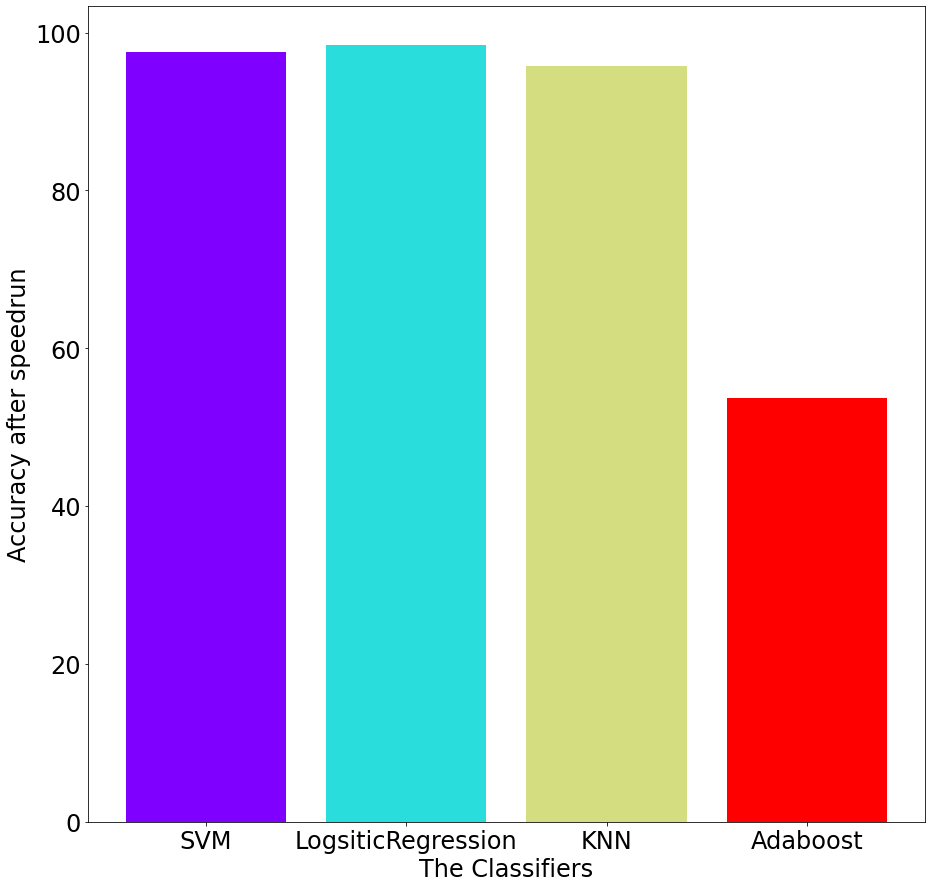

In [26]:
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 24})
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['SVM', 'LogsiticRegression', 'KNN', 'Adaboost']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('The Classifiers')
plt.ylabel('Accuracy after speedrun')

We are dropping Adaboost Classifier from here and will go on to tune parameters for the other classifiers and then choose the best one

## Parameter tuning for KNN using all feature vectors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
leaf_size = list(range(1,30))
n_neighbors = list(range(1,50))
p = [2]          #[1,2]
metric = ['euclidean', 'manhattan', 'minkowski']
weights = ['uniform']            #['uniform', 'distance']

# #Convert to dictionary
hyperparameters = dict(n_neighbors = n_neighbors,weights = weights, metric = metric, leaf_size = leaf_size, p = p )

# #Create new KNN object
KNN2 = KNeighborsClassifier()

# #Use GridSearch
clf = GridSearchCV(KNN2, hyperparameters, cv = 10)

# #Fit the model
best_model_KNN = clf.fit(fl_train,fl_train_label.values.ravel())



Best leaf_size: 1
Best n_neighbors: 6
Best metric: manhattan


In [46]:
#Print The value of best Hyperparameters


print('Best leaf_size:', best_model_KNN.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_KNN.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_KNN.best_estimator_.get_params()['n_neighbors'])
print('Best weights:', best_model_KNN.best_estimator_.get_params()['weights'])
print('Best metric:', best_model_KNN.best_estimator_.get_params()['metric'])


Best_leaf_size = best_model_KNN.best_estimator_.get_params()['leaf_size']
Best_p = best_model_KNN.best_estimator_.get_params()['p']
Best_n_neighbors = best_model_KNN.best_estimator_.get_params()['n_neighbors']
Best_weights = best_model_KNN.best_estimator_.get_params()['weights']
Best_metric = best_model_KNN.best_estimator_.get_params()['metric']


Best leaf_size: 1
Best p: 2
Best n_neighbors: 6
Best weights: uniform
Best metric: manhattan


 ------------------------------
 Classification Report for SVM
 ------------------------------
                    precision    recall  f1-score   support

            LAYING     0.9947    0.9921    0.9934       381
           SITTING     0.9212    0.9417    0.9313       360
          STANDING     0.9489    0.9314    0.9401       379
           WALKING     0.9829    0.9971    0.9900       346
WALKING_DOWNSTAIRS     1.0000    0.9718    0.9857       284
  WALKING_UPSTAIRS     0.9904    1.0000    0.9952       310

          accuracy                         0.9714      2060
         macro avg     0.9730    0.9724    0.9726      2060
      weighted avg     0.9715    0.9714    0.9714      2060

KNN Classifier accuracy: 97.13592233009709%


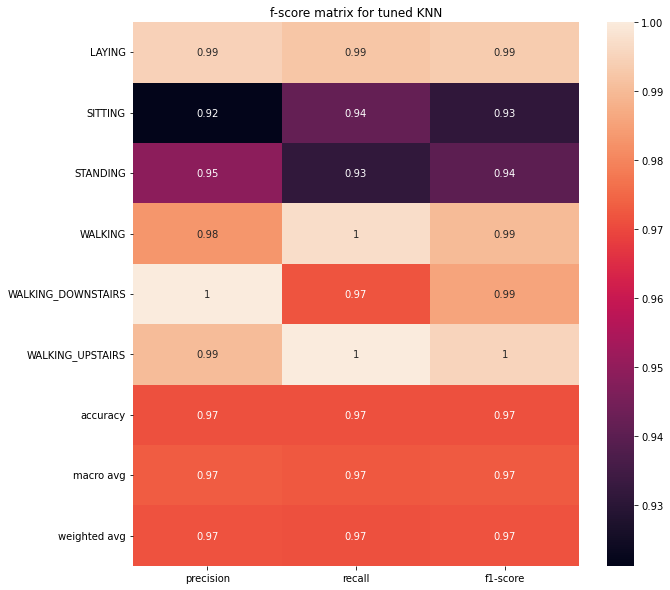

In [47]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 6 ,weights = 'uniform', metric = 'manhattan', leaf_size = 1, p = 2)
clf_KNN = KNN.fit(fl_train, fl_train_label.values.ravel())
KNN_pred = KNN.predict(fl_test)

tbl = np.reshape(KNN_pred, (len(KNN_pred),1))

                
dfKNN = pd.DataFrame(tbl)

y_true = fl_test_label
y_pred = dfKNN
print(' ------------------------------\n','\033[1m'+'\033[95m'+'Classification Report for SVM\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred, digits=4))
re = classification_report(y_true, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(re).iloc[:-1, :].T, annot=True)
plt.title ('f-score matrix for tuned KNN')
accuracy_scores_KNN = accuracy_score(y_true, y_pred)*100
print('\033[1m'+'\033[92m'+'KNN Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores_KNN))

                          -------------------------
                          Confusion Matrix for KNN
                          -------------------------


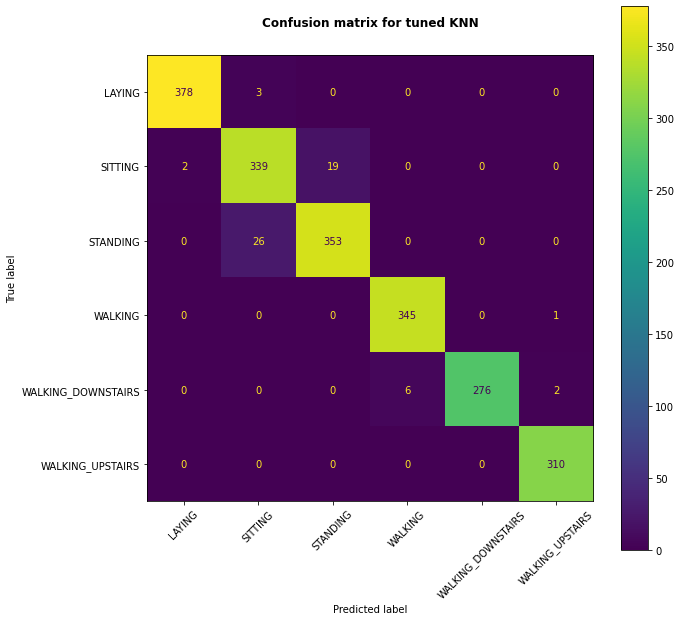

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for KNN\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(fl_test_label, KNN_pred, labels=clf_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_KNN.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for tuned KNN',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

## Parameter tuning for SVM using all feature vectors

In [11]:
from sklearn.svm import SVC

C = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
kernel = ['linear', 'poly', 'rbf','sigmoid']
gamma = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]


# #Convert to dictionary
hyperparameters = dict(C = C,kernel = kernel, gamma = gamma)

# #Create new KNN object
SVC = SVC()

# #Use GridSearch
clf = GridSearchCV(SVC, hyperparameters, cv = 10)

# #Fit the model
best_model_SVC = clf.fit(fl_train,fl_train_label.values.ravel())

In [13]:
#Print The value of best Hyperparameters


print('Best C:', best_model_SVC.best_estimator_.get_params()['C'])
print('Best kernel:', best_model_SVC.best_estimator_.get_params()['kernel'])
print('Best gamma:', best_model_SVC.best_estimator_.get_params()['gamma'])



Best_C = best_model_SVC.best_estimator_.get_params()['C']
Best_kernel = best_model_SVC.best_estimator_.get_params()['kernel']
Best_gamma = best_model_SVC.best_estimator_.get_params()['gamma']

Best C: 50
Best kernel: rbf
Best gamma: 0.001


 ------------------------------
 Classification Report for SVM
 ------------------------------
                    precision    recall  f1-score   support

            LAYING     0.9974    1.0000    0.9987       381
           SITTING     0.9694    0.9667    0.9680       360
          STANDING     0.9710    0.9710    0.9710       379
           WALKING     0.9971    1.0000    0.9986       346
WALKING_DOWNSTAIRS     1.0000    0.9965    0.9982       284
  WALKING_UPSTAIRS     1.0000    1.0000    1.0000       310

          accuracy                         0.9883      2060
         macro avg     0.9891    0.9890    0.9891      2060
      weighted avg     0.9883    0.9883    0.9883      2060

SVM Classifier accuracy: 98.83495145631068%


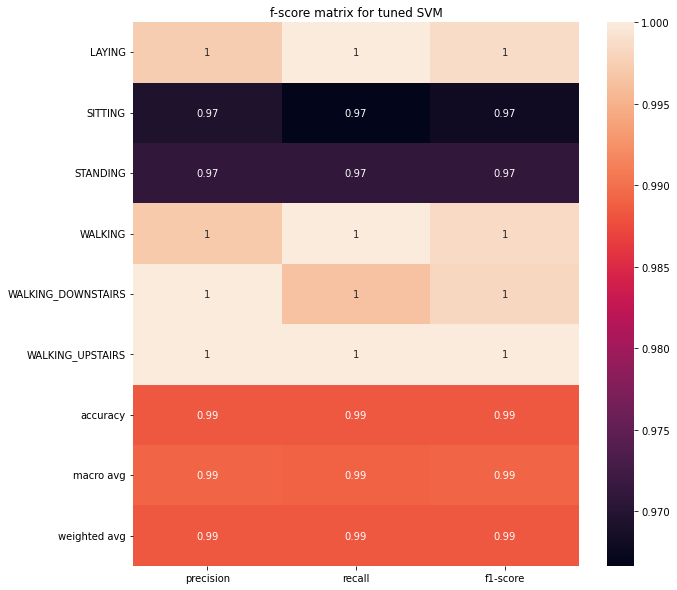

In [50]:
from sklearn.svm import SVC
SVM = SVC(C = 50 ,kernel = 'rbf', gamma = 0.001)
clf_SVM = SVM.fit(fl_train, fl_train_label.values.ravel())
SVM_pred = SVM.predict(fl_test)

tbl = np.reshape(SVM_pred, (len(SVM_pred),1))

                
dfSVM = pd.DataFrame(tbl)

y_true = fl_test_label
y_pred = dfSVM
print(' ------------------------------\n','\033[1m'+'\033[95m'+'Classification Report for SVM\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred, digits=4))
re = classification_report(y_true, y_pred,digits=4, output_dict=True)
sns.heatmap(pd.DataFrame(re).iloc[:-1, :].T, annot=True)
plt.title ('f-score matrix for tuned SVM')
accuracy_scores_SVM = accuracy_score(y_true, y_pred)*100
print('\033[1m'+'\033[92m'+'SVM Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores_SVM))

                          -------------------------
                          Confusion Matrix for SVM
                          -------------------------


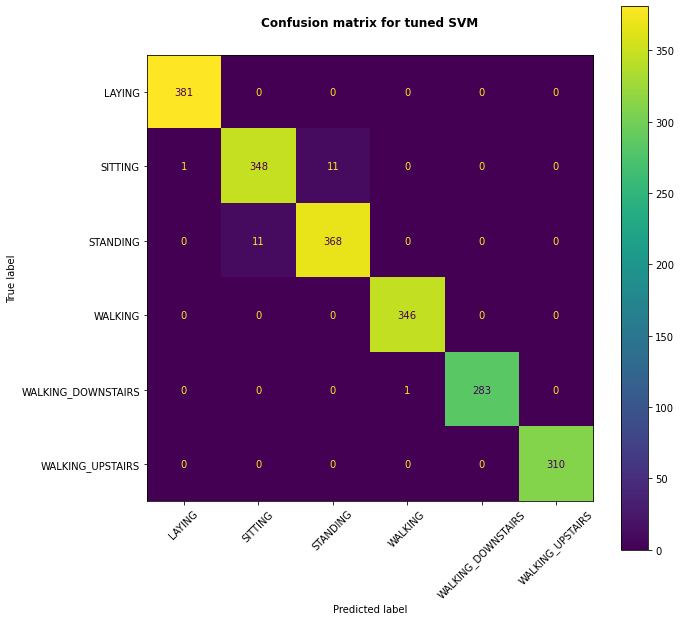

In [49]:
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for SVM\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(fl_test_label, SVM_pred, labels=clf_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_SVM.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for tuned SVM',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

## Parameter tuning for LogisticRegression using all feature vectors

In [16]:
from sklearn.linear_model import LogisticRegression

C = [0.001, 0.10, 0.1, 10, 25, 50, 100]
# penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['lbfgs','newton-cg','liblinear']
max_iter = [1000, 5000, 10000, 20000]


# #Convert to dictionary
hyperparameters = dict(C = C, solver = solver, max_iter = max_iter)

# #Create new KNN object
LOGR = LogisticRegression()

# #Use GridSearch
clf = GridSearchCV(LOGR, hyperparameters, cv = 10)

# #Fit the model
best_model_LOG = clf.fit(fl_train,fl_train_label.values.ravel())

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [17]:
#Print The value of best Hyperparameters


print('Best C:', best_model_LOG.best_estimator_.get_params()['C'])
print('Best penalty:', best_model_LOG.best_estimator_.get_params()['penalty'])
print('Best solver:', best_model_LOG.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_model_LOG.best_estimator_.get_params()['max_iter'])


Best_C_LOG = best_model_LOG.best_estimator_.get_params()['C']
Best_penalty = best_model_LOG.best_estimator_.get_params()['penalty']
Best_solver = best_model_LOG.best_estimator_.get_params()['solver']
Best_max_iter = best_model_LOG.best_estimator_.get_params()['max_iter']

Best C: 25
Best penalty: l2
Best solver: lbfgs
Best max_iter: 5000


 ---------------------------------------------
 Classification Report for LogisticRegression
 ---------------------------------------------
                    precision    recall  f1-score   support

            LAYING     0.9974    0.9974    0.9974       381
           SITTING     0.9642    0.9722    0.9682       360
          STANDING     0.9761    0.9683    0.9722       379
           WALKING     1.0000    0.9971    0.9986       346
WALKING_DOWNSTAIRS     0.9965    0.9930    0.9947       284
  WALKING_UPSTAIRS     0.9904    0.9968    0.9936       310

          accuracy                         0.9869      2060
         macro avg     0.9874    0.9875    0.9874      2060
      weighted avg     0.9869    0.9869    0.9869      2060

LogisticRegression Classifier accuracy: 98.68932038834951%


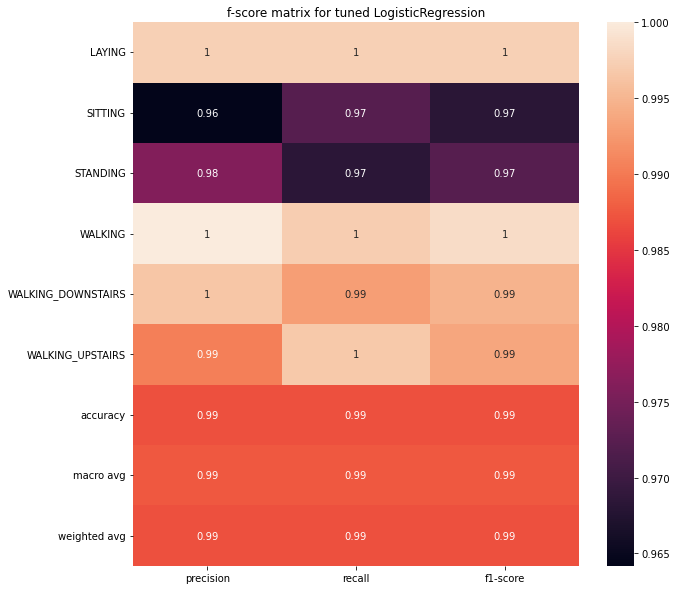

In [54]:
from sklearn.linear_model import LogisticRegression
LOGR = LogisticRegression(C = 25 ,penalty = 'l2', solver = 'lbfgs', max_iter = 5000)
clf_LOGR = LOGR.fit(fl_train, fl_train_label.values.ravel())
LOGR_pred = LOGR.predict(fl_test)

tbl = np.reshape(LOGR_pred, (len(LOGR_pred),1))

                
dfLOGR = pd.DataFrame(tbl)

y_true = fl_test_label
y_pred = dfLOGR
print(' ---------------------------------------------\n','\033[1m'+'\033[95m'+'Classification Report for LogisticRegression\n'+'\033[0m','---------------------------------------------')
print(classification_report(y_true, y_pred, digits=4))
re = classification_report(y_true, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(re).iloc[:-1, :].T, annot=True)
plt.title ('f-score matrix for tuned LogisticRegression')
accuracy_scores_LOGR = accuracy_score(y_true, y_pred)*100
print('\033[1m'+'\033[92m'+'LogisticRegression Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores_LOGR))


                          -------------------------
                          Confusion Matrix for LOG
                          -------------------------


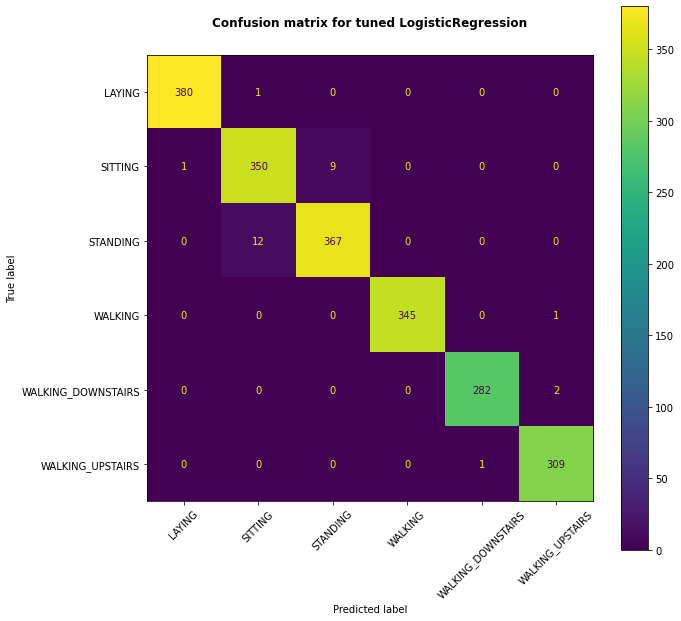

In [53]:
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for LOG\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(fl_test_label, LOGR_pred, labels=clf_LOGR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_LOGR.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for tuned LogisticRegression',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

# Comparing accuracy of the three tuned classifiers

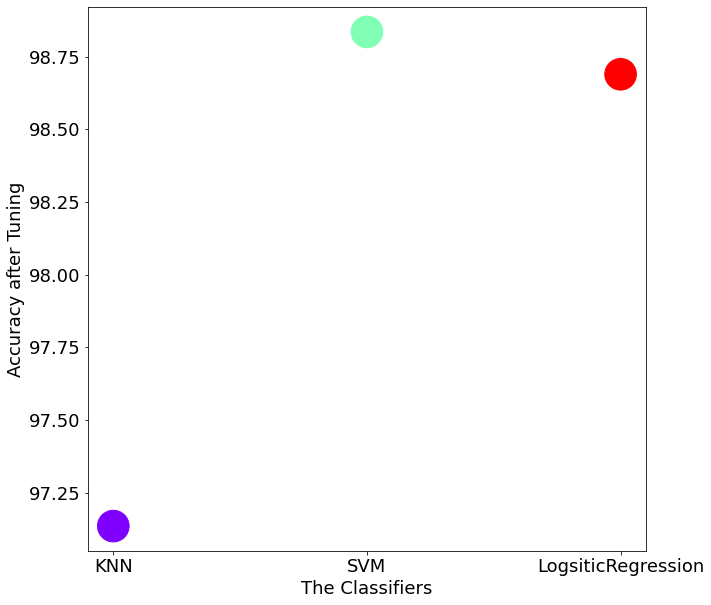

In [101]:
colors = cm.rainbow(np.linspace(0, 1, 3))
labels = ['KNN', 'SVM', 'LogsiticRegression']
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 18})
plt.scatter(labels,
        [accuracy_scores_KNN,accuracy_scores_SVM,accuracy_scores_LOGR],
        color = colors, s=1000)
plt.xlabel('The Classifiers')
plt.ylabel('Accuracy after Tuning');

  Till now we have got that the <span style='color:Red'>SVM classifier </span>after tuning gives us the best accuracy 

# <span style='color:Green'> Applying feature engineering  </span>

# Using KBest feature selection

In [209]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



X = MinMaxScaler().fit_transform(scaled_x)
y = df_labels
  
# Convert to categorical data by converting data to integers

  
# Two features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(X, y)
  
# Reduced features
print('Original feature number:', X.shape[1])
print('Reduced feature number:', X_kbest_features.shape[1])
X_KB = pd.DataFrame(X_kbest_features, columns = ['Feature '+str(i) for i in range(X_kbest_features.shape[1])])
X_KB

Original feature number: 561
Reduced feature number: 10


,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,0.105043,0.049459,0.524973,0.405817,0.475790,0.357251,0.374704,0.229443,0.416701,0.336953
1,0.641617,0.040699,0.923330,0.832801,0.816946,0.841941,0.892571,0.763746,0.788190,0.773303
2,0.031688,0.616014,0.083733,0.026822,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000
3,0.030784,0.028656,0.117668,0.000000,0.155882,0.000000,0.000000,0.000000,0.125967,0.029517
4,0.769955,0.046611,0.964740,0.894077,0.882816,0.917364,0.932311,0.770844,0.874163,0.846350
...,...,...,...,...,...,...,...,...,...,...
8234,0.032627,0.069308,0.230470,0.063054,0.092107,0.000000,0.000000,0.244758,0.141713,0.196708
8235,0.033725,0.565769,0.090386,0.063054,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000
8236,0.039474,0.041853,0.265115,0.091366,0.222279,0.048638,0.103691,0.049988,0.187157,0.051000
8237,0.032962,0.017663,0.134269,0.026822,0.145168,0.028151,0.000000,0.000000,0.118144,0.000000


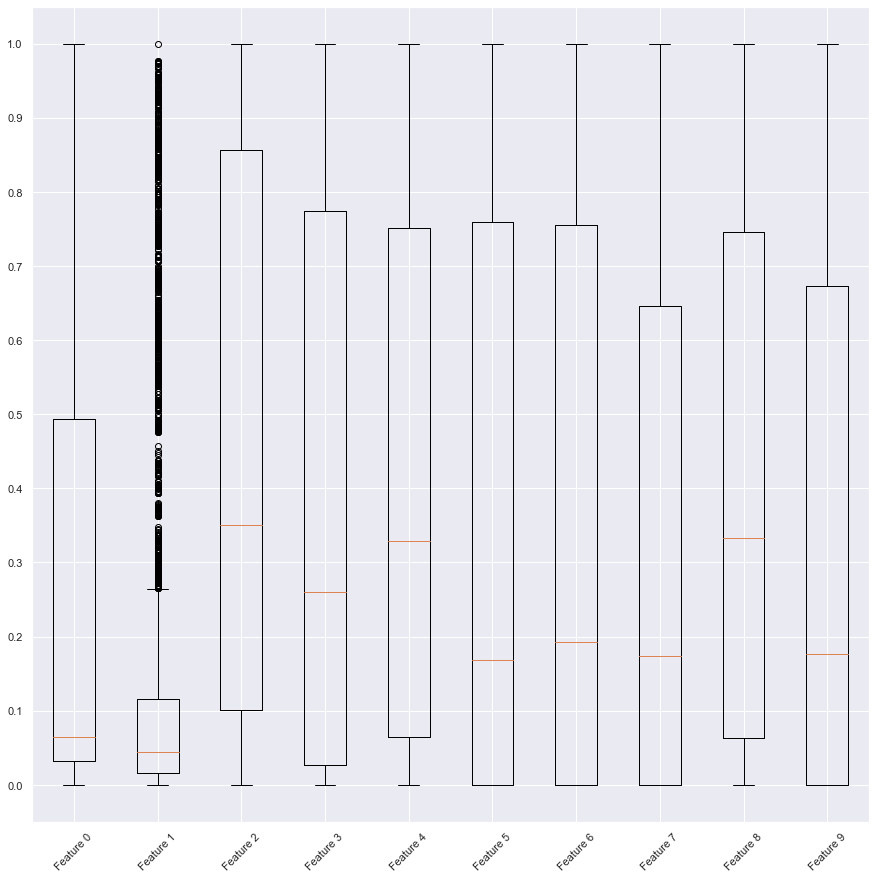

In [210]:
ax = plt.subplot()
ax.boxplot(X_KB)
plt.grid(True)
plt.yticks(np.linspace(0,1, 11))
ax.set_xticklabels(labels = ['Feature '+str(i) for i in range(X_kbest_features.shape[1])], rotation = 45);

In [197]:
X_KB = X_KB.drop(columns = ['Feature 1']) #dropping the discrepant column
X_KB

,Feature 0,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
0,0.105043,0.524973,0.405817,0.475790,0.357251,0.374704,0.229443,0.416701,0.336953
1,0.641617,0.923330,0.832801,0.816946,0.841941,0.892571,0.763746,0.788190,0.773303
2,0.031688,0.083733,0.026822,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000
3,0.030784,0.117668,0.000000,0.155882,0.000000,0.000000,0.000000,0.125967,0.029517
4,0.769955,0.964740,0.894077,0.882816,0.917364,0.932311,0.770844,0.874163,0.846350
...,...,...,...,...,...,...,...,...,...
8234,0.032627,0.230470,0.063054,0.092107,0.000000,0.000000,0.244758,0.141713,0.196708
8235,0.033725,0.090386,0.063054,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000
8236,0.039474,0.265115,0.091366,0.222279,0.048638,0.103691,0.049988,0.187157,0.051000
8237,0.032962,0.134269,0.026822,0.145168,0.028151,0.000000,0.000000,0.118144,0.000000


In [198]:
frames = [X_KB, df_labels]
principal_HAR_scaled_Df = pd.concat(frames, axis=1)
principal_HAR_scaled_Df # Adding the labels 

,Feature 0,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Activity
0,0.105043,0.524973,0.405817,0.475790,0.357251,0.374704,0.229443,0.416701,0.336953,STANDING
1,0.641617,0.923330,0.832801,0.816946,0.841941,0.892571,0.763746,0.788190,0.773303,WALKING
2,0.031688,0.083733,0.026822,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000,LAYING
3,0.030784,0.117668,0.000000,0.155882,0.000000,0.000000,0.000000,0.125967,0.029517,STANDING
4,0.769955,0.964740,0.894077,0.882816,0.917364,0.932311,0.770844,0.874163,0.846350,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...
8234,0.032627,0.230470,0.063054,0.092107,0.000000,0.000000,0.244758,0.141713,0.196708,LAYING
8235,0.033725,0.090386,0.063054,0.000000,0.000000,0.000000,0.000000,0.026909,0.000000,LAYING
8236,0.039474,0.265115,0.091366,0.222279,0.048638,0.103691,0.049988,0.187157,0.051000,STANDING
8237,0.032962,0.134269,0.026822,0.145168,0.028151,0.000000,0.000000,0.118144,0.000000,STANDING


In [199]:
df_trainKB = principal_HAR_scaled_Df.drop(columns = ['Activity'])
df_labelKB = principal_HAR_scaled_Df.filter(['Activity'])
df_labelKB

,Activity
0,STANDING
1,WALKING
2,LAYING
3,STANDING
4,WALKING_DOWNSTAIRS
...,...
8234,LAYING
8235,LAYING
8236,STANDING
8237,STANDING


In [200]:
f_train1, f_test1, train_label1, test_label1 = train_test_split(df_trainKB, df_labelKB, train_size=0.70, random_state= 42, stratify = df_labelKB)
f_test1

,Feature 0,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9
7564,0.730971,0.860434,0.857708,0.753912,0.822051,0.738108,0.546605,0.766376,0.733630
4572,0.036264,0.223158,0.046342,0.233035,0.028151,0.117671,0.028932,0.161883,0.000000
3322,0.028980,0.091241,0.000000,0.027565,0.000000,0.000000,0.000000,0.000000,0.000000
1946,0.524781,0.812119,0.804119,0.728569,0.788196,0.735602,0.602516,0.749519,0.698460
1379,0.804399,0.930404,0.896398,0.818190,0.903629,0.850008,0.744586,0.838768,0.804137
...,...,...,...,...,...,...,...,...,...
1287,0.038562,0.214798,0.077911,0.027565,0.028151,0.000000,0.068015,0.091663,0.029517
4376,0.335839,0.833453,0.712149,0.717585,0.686818,0.656320,0.736629,0.688976,0.648499
786,0.030180,0.038931,0.000000,0.027565,0.000000,0.000000,0.000000,0.026909,0.000000
7552,0.480337,0.818820,0.688876,0.626975,0.765496,0.558021,0.636773,0.738130,0.607024


In [201]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score

accuracy_scores = np.zeros(3)

# Support Vector Classifier
clf = SVC().fit(f_train1, train_label1.values.ravel())
prediction = clf.predict(f_test1)
accuracy_scores[0] = accuracy_score(test_label1, prediction)*100
print('\033[1m'+'Support Vector Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(max_iter=10000).fit(f_train1, train_label1.values.ravel())
prediction = clf.predict(f_test1)
accuracy_scores[1] = accuracy_score(test_label1, prediction)*100
print('\033[1m'+'Logistic Regression accuracy:'+'\033[0m','{}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(f_train1, train_label1.values.ravel())
prediction = clf.predict(f_test1)
accuracy_scores[2] = accuracy_score(test_label1, prediction)*100
print('\033[1m'+'K Nearest Neighbors Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[2]))


Support Vector Classifier accuracy: 68.93203883495146%
Logistic Regression accuracy: 67.63754045307444%
K Nearest Neighbors Classifier accuracy: 68.85113268608414%


## Removing features with more than 0.9 Correlation

In [202]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

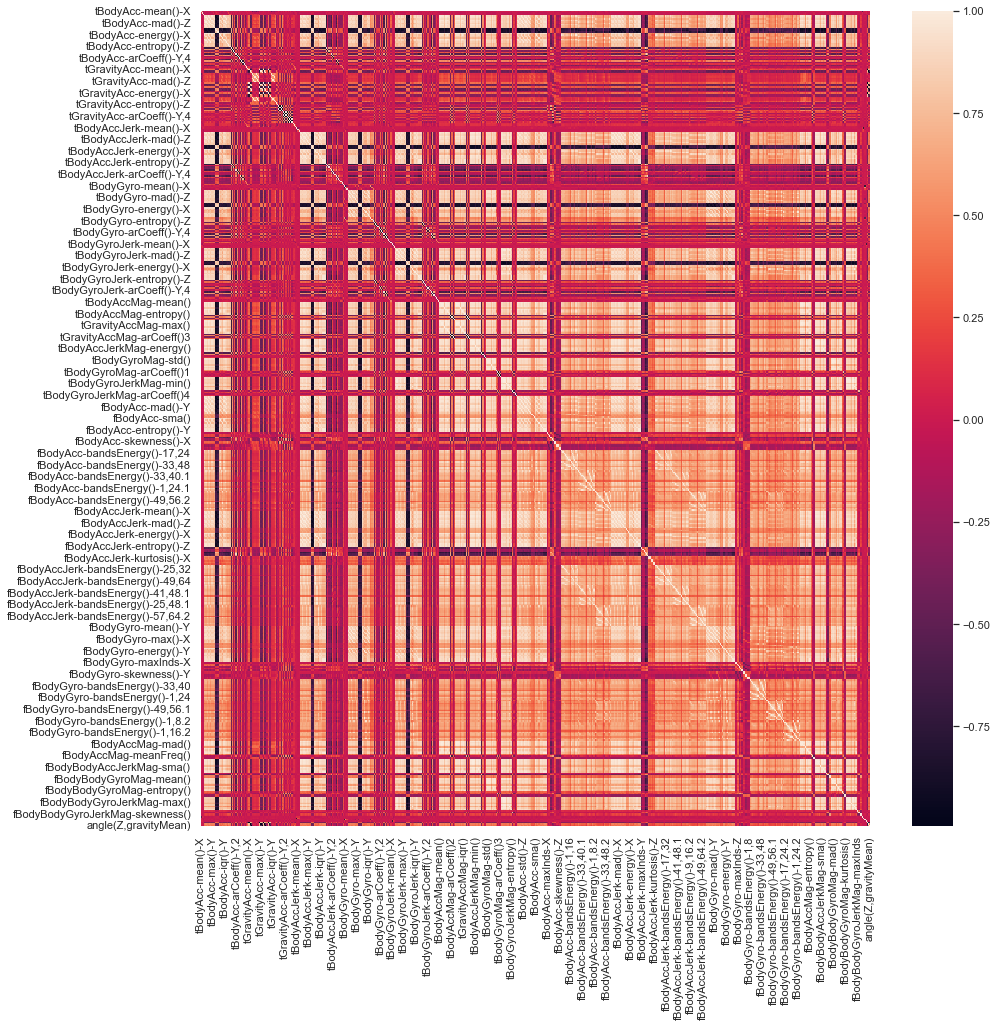

In [203]:
corr = df_train.corr()
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr)

In [223]:
# Removing Features with correlation more than 0.9 with another feature
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = scaled_x.columns[columns]
X_COR = scaled_x[selected_columns]



In [224]:
X_COR

,0,1,2,3,5,12,13,14,22,23,...,550,551,552,554,555,556,557,558,559,560
0,0.175704,-0.153496,-0.255846,-0.706319,-0.667883,0.507249,0.482003,0.682561,0.493601,0.035172,...,-0.490088,-1.802383,-0.188949,-0.670225,0.503069,0.228486,-0.871743,-0.512437,0.609209,0.015880
1,0.851055,0.430982,-1.064829,1.303886,0.808623,-1.681011,-1.158839,-1.092947,1.542385,1.131898,...,0.204255,0.836596,1.885254,-0.592986,-1.294918,-0.710091,1.448148,-0.520526,0.565869,-0.062358
2,-0.107503,-0.019675,0.142625,-0.878094,-0.932606,0.890972,0.893025,0.853643,-1.240865,-1.343532,...,-0.721536,0.520061,-0.284454,-0.478468,0.352742,-1.041402,1.162900,2.143637,-1.973493,-1.566789
3,0.030466,-0.061327,-0.089104,-0.889180,-0.925589,0.881937,0.828271,0.830738,-1.312226,-0.603283,...,-0.721536,-2.749053,1.093956,0.061001,-0.216165,0.018301,-0.824000,-0.626360,0.488503,0.074325
4,-0.086822,0.357357,0.265134,2.462030,1.131813,-1.844058,-1.283105,-2.019373,0.516505,1.106096,...,0.204255,-0.300338,0.490310,0.794882,0.799160,1.413693,1.776895,-0.548661,0.605285,0.324616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,-0.053934,0.171282,-0.046232,-0.871667,-0.843942,0.851545,0.867576,0.618325,-1.056359,-0.372520,...,-0.721536,0.226798,0.146211,-1.072011,-0.187873,0.271838,-0.353004,2.283265,-0.512724,3.795610
8235,-0.192588,0.015635,0.108152,-0.873033,-0.937112,0.869374,0.899754,0.848004,-1.227786,-1.266153,...,-0.258641,-0.159121,0.128041,-0.261162,-0.245337,-0.910257,1.188859,1.843038,-1.866007,-1.628490
8236,0.063425,-0.054819,-0.179326,-0.862256,-0.855165,0.859928,0.742192,0.752887,-0.585567,-0.502899,...,-0.721536,-0.676519,2.028215,-0.230944,-0.140623,-1.202709,-1.336750,-0.579795,0.568853,0.188684
8237,0.135449,0.283536,-0.385758,-0.885573,-0.845022,0.902484,0.882052,0.771340,-0.796809,-0.118470,...,-0.490088,1.103485,-0.902306,-0.179427,-0.042381,-1.254599,-1.646719,-0.715116,0.405051,0.359529


In [231]:
frames = [X_COR, df_labels]
principal_HAR_scaled_Df = pd.concat(frames, axis=1)
principal_HAR_scaled_Df # Adding the labels 

,0,1,2,3,5,12,13,14,22,23,...,551,552,554,555,556,557,558,559,560,Activity
0,0.175704,-0.153496,-0.255846,-0.706319,-0.667883,0.507249,0.482003,0.682561,0.493601,0.035172,...,-1.802383,-0.188949,-0.670225,0.503069,0.228486,-0.871743,-0.512437,0.609209,0.015880,STANDING
1,0.851055,0.430982,-1.064829,1.303886,0.808623,-1.681011,-1.158839,-1.092947,1.542385,1.131898,...,0.836596,1.885254,-0.592986,-1.294918,-0.710091,1.448148,-0.520526,0.565869,-0.062358,WALKING
2,-0.107503,-0.019675,0.142625,-0.878094,-0.932606,0.890972,0.893025,0.853643,-1.240865,-1.343532,...,0.520061,-0.284454,-0.478468,0.352742,-1.041402,1.162900,2.143637,-1.973493,-1.566789,LAYING
3,0.030466,-0.061327,-0.089104,-0.889180,-0.925589,0.881937,0.828271,0.830738,-1.312226,-0.603283,...,-2.749053,1.093956,0.061001,-0.216165,0.018301,-0.824000,-0.626360,0.488503,0.074325,STANDING
4,-0.086822,0.357357,0.265134,2.462030,1.131813,-1.844058,-1.283105,-2.019373,0.516505,1.106096,...,-0.300338,0.490310,0.794882,0.799160,1.413693,1.776895,-0.548661,0.605285,0.324616,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8234,-0.053934,0.171282,-0.046232,-0.871667,-0.843942,0.851545,0.867576,0.618325,-1.056359,-0.372520,...,0.226798,0.146211,-1.072011,-0.187873,0.271838,-0.353004,2.283265,-0.512724,3.795610,LAYING
8235,-0.192588,0.015635,0.108152,-0.873033,-0.937112,0.869374,0.899754,0.848004,-1.227786,-1.266153,...,-0.159121,0.128041,-0.261162,-0.245337,-0.910257,1.188859,1.843038,-1.866007,-1.628490,LAYING
8236,0.063425,-0.054819,-0.179326,-0.862256,-0.855165,0.859928,0.742192,0.752887,-0.585567,-0.502899,...,-0.676519,2.028215,-0.230944,-0.140623,-1.202709,-1.336750,-0.579795,0.568853,0.188684,STANDING
8237,0.135449,0.283536,-0.385758,-0.885573,-0.845022,0.902484,0.882052,0.771340,-0.796809,-0.118470,...,1.103485,-0.902306,-0.179427,-0.042381,-1.254599,-1.646719,-0.715116,0.405051,0.359529,STANDING


In [232]:
df_trainCOR = principal_HAR_scaled_Df.drop(columns = ['Activity'])
df_labelCOR = principal_HAR_scaled_Df.filter(['Activity'])
df_labelCOR

,Activity
0,STANDING
1,WALKING
2,LAYING
3,STANDING
4,WALKING_DOWNSTAIRS
...,...
8234,LAYING
8235,LAYING
8236,STANDING
8237,STANDING


In [233]:
f_train2, f_test2, train_label2, test_label2 = train_test_split(df_trainCOR, df_labelCOR, train_size=0.70, random_state= 42, stratify = df_labelCOR)
f_test2

,0,1,2,3,5,12,13,14,22,23,...,550,551,552,554,555,556,557,558,559,560
7564,1.618817,-0.730082,-0.204743,1.152651,0.356395,-0.774655,-0.404974,-0.181770,0.877811,0.606096,...,-0.027193,0.372159,-0.804595,-2.250194,-0.097530,-1.633216,-1.291069,-0.542661,0.582566,0.469519
4572,0.051838,-0.126704,0.497588,-0.877849,-0.846896,0.888765,0.840944,0.854869,-0.889845,-0.666116,...,-0.490088,-0.423431,-0.741013,-0.079409,0.005088,0.973844,-0.227273,-0.748667,-0.125346,0.076081
3322,0.012059,0.177501,-0.005976,-0.893539,-0.922599,0.910994,0.899089,0.817795,-1.495218,-0.847024,...,-0.258641,1.422023,0.181671,0.399028,-0.480929,0.081829,0.504705,-0.717235,0.259643,0.577683
1946,-1.328375,0.188752,-1.108469,0.488844,0.939658,-0.745287,-1.050279,-1.434000,0.443386,0.527196,...,-0.258641,-0.892622,-0.394595,0.947445,0.718836,-0.889660,-1.462341,-0.020263,1.026133,0.956770
1379,0.547381,0.099846,0.802290,2.256266,0.965813,-2.359839,-1.751465,-0.414758,0.738406,1.296380,...,0.204255,-0.557831,-0.546925,-1.079024,0.239926,1.004568,1.883493,-0.618203,0.418905,-0.077796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,0.257502,0.020620,-0.514497,-0.870326,-0.873823,0.876527,0.877621,0.755921,-0.312550,-1.022992,...,-0.721536,1.446431,0.609827,0.160999,0.962921,0.616467,-1.435413,2.171507,-3.298952,0.008092
4376,-1.023649,0.211651,-0.784657,0.404588,1.699108,-0.277913,-0.741508,-1.788430,0.244188,1.043562,...,0.204255,-0.744235,-0.036255,0.971378,-1.763660,-1.457104,0.420937,-0.321660,0.357480,1.113424
786,0.026999,-0.017995,-0.108944,-0.890603,-0.944576,0.912290,0.896309,0.848664,-1.307622,-1.411912,...,-0.721536,0.050872,-0.518698,0.148743,0.662274,-0.163108,0.850595,-0.644315,0.497244,0.222730
7552,-0.561463,3.345979,-0.847947,0.645326,1.280809,-0.790060,-0.310993,-1.037987,1.243395,1.553602,...,0.204255,0.223997,-1.035461,-0.001828,1.302735,1.536696,1.704100,-0.322625,0.000503,1.158612


In [234]:

accuracy_scores = np.zeros(3)

# Support Vector Classifier
clf = SVC().fit(f_train2, train_label2.values.ravel())
prediction = clf.predict(f_test2)
accuracy_scores[0] = accuracy_score(test_label2, prediction)*100
print('\033[1m'+'Support Vector Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(max_iter=10000).fit(f_train2, train_label2.values.ravel())
prediction = clf.predict(f_test2)
accuracy_scores[1] = accuracy_score(test_label2, prediction)*100
print('\033[1m'+'Logistic Regression accuracy:'+'\033[0m','{}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(f_train2, train_label2.values.ravel())
prediction = clf.predict(f_test2)
accuracy_scores[2] = accuracy_score(test_label2, prediction)*100
print('\033[1m'+'K Nearest Neighbors Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[2]))

Support Vector Classifier accuracy: 97.33009708737865%
Logistic Regression accuracy: 97.168284789644%
K Nearest Neighbors Classifier accuracy: 93.44660194174757%


## Applying Principal Component Analysis

In [244]:
scaled_x = pd.DataFrame(scaled_x)
np.mean(scaled_x),np.std(scaled_x)

(0     -4.994858e-16
 1      1.749925e-17
 2     -2.734795e-17
 3     -1.200642e-16
 4      2.616887e-17
            ...     
 556   -3.341854e-17
 557    1.506529e-17
 558    2.495610e-17
 559   -3.432137e-17
 560   -2.684095e-18
 Length: 561, dtype: float64,
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 556    1.0
 557    1.0
 558    1.0
 559    1.0
 560    1.0
 Length: 561, dtype: float64)

In [236]:
from sklearn.decomposition import PCA

n_components=10 # Number of major features to work on

pca_HAR = PCA(n_components)
principalComponents_HAR = pca_HAR.fit_transform(scaled_x)

df_PCA = pd.DataFrame(data = principalComponents_HAR
             , columns = ['PC '+str(i) for i in range(n_components)])
df_PCA

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
0,-7.461131,-5.357979,-4.005851,-4.568944,-0.548047,-2.656711,-1.516343,2.686718,1.725618,1.532516
1,24.370010,11.514614,-6.020695,4.647393,3.547874,-0.441963,-0.247933,-1.798864,-8.822147,7.604802
2,-16.107990,6.027704,1.295552,3.616360,-4.755590,1.823827,-0.124233,0.541590,1.005953,0.570538
3,-14.564528,-1.838109,-0.134136,-2.216238,4.621958,-2.028144,-2.310611,2.257345,1.463475,0.581276
4,36.273972,5.987609,-5.856969,7.152011,4.213354,-1.911151,-1.618424,3.610671,0.947734,-2.924247
...,...,...,...,...,...,...,...,...,...,...
8234,-14.331843,5.054850,0.170137,-1.149024,-1.305493,0.522513,0.438506,-0.446074,-0.889633,0.221418
8235,-15.830508,5.758962,0.379579,2.701165,-5.321064,0.729198,0.695545,1.129304,1.657989,2.097836
8236,-12.569365,-2.112759,-2.743552,-4.901082,2.755767,-3.221130,-1.628394,1.325218,1.710804,2.112640
8237,-14.874128,-0.158741,0.246903,-3.185590,5.201566,-1.495151,-1.260963,-1.864089,-1.875302,-1.451034


In [240]:
frames = [df_PCA, df_labels]
principal_HAR_scaled_Df = pd.concat(frames, axis=1)
principal_HAR_scaled_Df # Adding the labels after PCA

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,Activity
0,-7.461131,-5.357979,-4.005851,-4.568944,-0.548047,-2.656711,-1.516343,2.686718,1.725618,1.532516,STANDING
1,24.370010,11.514614,-6.020695,4.647393,3.547874,-0.441963,-0.247933,-1.798864,-8.822147,7.604802,WALKING
2,-16.107990,6.027704,1.295552,3.616360,-4.755590,1.823827,-0.124233,0.541590,1.005953,0.570538,LAYING
3,-14.564528,-1.838109,-0.134136,-2.216238,4.621958,-2.028144,-2.310611,2.257345,1.463475,0.581276,STANDING
4,36.273972,5.987609,-5.856969,7.152011,4.213354,-1.911151,-1.618424,3.610671,0.947734,-2.924247,WALKING_DOWNSTAIRS
...,...,...,...,...,...,...,...,...,...,...,...
8234,-14.331843,5.054850,0.170137,-1.149024,-1.305493,0.522513,0.438506,-0.446074,-0.889633,0.221418,LAYING
8235,-15.830508,5.758962,0.379579,2.701165,-5.321064,0.729198,0.695545,1.129304,1.657989,2.097836,LAYING
8236,-12.569365,-2.112759,-2.743552,-4.901082,2.755767,-3.221130,-1.628394,1.325218,1.710804,2.112640,STANDING
8237,-14.874128,-0.158741,0.246903,-3.185590,5.201566,-1.495151,-1.260963,-1.864089,-1.875302,-1.451034,STANDING


In [241]:
print('Explained variation per principal component: {}'.format(pca_HAR.explained_variance_ratio_))
var2 = pca_HAR.explained_variance_ratio_ # Variance of the extracted features

Explained variation per principal component: [0.50714107 0.06237025 0.02675319 0.02460919 0.01877694 0.0161985
 0.01408055 0.01218201 0.00998354 0.00962976]


In [242]:
#Total variance coverage by Scaled data
var_S = sum(var2)
var_S

0.7017249846017117

## Removing Outliers

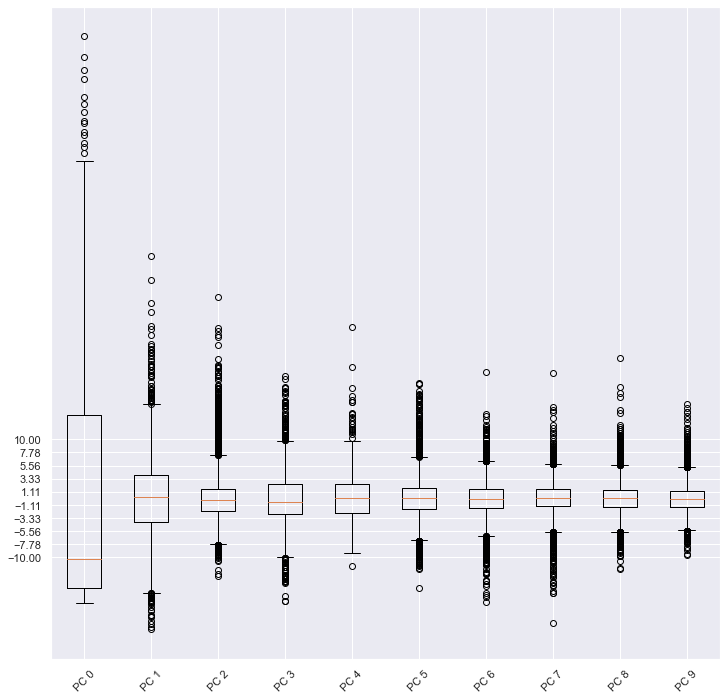

In [345]:
principal_HAR_scaled_Df.dropna()
plt.rcParams.update({'figure.figsize': [12, 12], 'font.size': 10})
ax = plt.subplot()
ax.boxplot(principal_HAR_scaled_Df.drop(columns = 'Activity'))
plt.grid(True)
plt.yticks(np.linspace(-n_components,n_components, 10))
ax.set_xticklabels(labels = ['PC '+str(i) for i in range(n_components)], rotation = 45);

In [248]:
principal_HAR_scaled = principal_HAR_scaled_Df[(principal_HAR_scaled_Df['PC 9'] < 5.56) & (principal_HAR_scaled_Df['PC 9'] > -5.56)]
principal_HAR_scaled

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,Activity
0,-7.461131,-5.357979,-4.005851,-4.568944,-0.548047,-2.656711,-1.516343,2.686718,1.725618,1.532516,STANDING
2,-16.107990,6.027704,1.295552,3.616360,-4.755590,1.823827,-0.124233,0.541590,1.005953,0.570538,LAYING
3,-14.564528,-1.838109,-0.134136,-2.216238,4.621958,-2.028144,-2.310611,2.257345,1.463475,0.581276,STANDING
4,36.273972,5.987609,-5.856969,7.152011,4.213354,-1.911151,-1.618424,3.610671,0.947734,-2.924247,WALKING_DOWNSTAIRS
5,-16.746969,10.580062,-1.154714,-0.584073,-0.517862,5.337438,3.153228,-2.906458,0.350890,-2.524509,SITTING
...,...,...,...,...,...,...,...,...,...,...,...
8234,-14.331843,5.054850,0.170137,-1.149024,-1.305493,0.522513,0.438506,-0.446074,-0.889633,0.221418,LAYING
8235,-15.830508,5.758962,0.379579,2.701165,-5.321064,0.729198,0.695545,1.129304,1.657989,2.097836,LAYING
8236,-12.569365,-2.112759,-2.743552,-4.901082,2.755767,-3.221130,-1.628394,1.325218,1.710804,2.112640,STANDING
8237,-14.874128,-0.158741,0.246903,-3.185590,5.201566,-1.495151,-1.260963,-1.864089,-1.875302,-1.451034,STANDING


In [249]:
principal_HAR_scaled['PC 9'].describe()

count    8009.000000
mean       -0.121113
std         1.972800
min        -5.522408
25%        -1.441960
50%        -0.164935
75%         1.157881
max         5.559818
Name: PC 9, dtype: float64

In [250]:
Outlier = principal_HAR_scaled_Df[(principal_HAR_scaled_Df['PC 9'] > 5.56) | (principal_HAR_scaled_Df['PC 9'] < -5.56)]
Outlier

,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,Activity
1,24.370010,11.514614,-6.020695,4.647393,3.547874,-0.441963,-0.247933,-1.798864,-8.822147,7.604802,WALKING
41,32.189932,1.899399,5.585201,-3.639214,-1.533982,-3.396647,-7.771764,2.095606,9.654150,-5.596334,WALKING_UPSTAIRS
108,-7.316328,-1.917559,-4.800050,-5.706959,-0.720840,-5.025782,-0.212372,5.157760,0.862005,7.744095,STANDING
149,-13.706532,3.304327,-1.786921,0.073346,-6.209705,-1.341996,-0.606982,5.874414,2.582136,6.032025,LAYING
185,12.418865,0.926229,-0.911113,-0.277476,0.216813,1.792493,-0.809535,0.083106,-4.633763,5.995520,WALKING
...,...,...,...,...,...,...,...,...,...,...,...
8073,-1.535865,-16.939234,5.611468,11.834836,1.736402,-5.675087,-1.314916,-5.939745,4.519188,6.742474,LAYING
8164,20.870732,-2.176789,-1.398853,-0.178435,-3.544660,-4.280416,0.379548,-2.039750,6.742907,-6.924713,WALKING_UPSTAIRS
8176,32.180654,0.740546,5.572093,-3.712097,-2.705918,-2.170593,-4.868140,0.208895,10.676780,-7.401647,WALKING_UPSTAIRS
8189,-16.303489,1.587206,5.655622,6.529307,-0.856386,0.018132,-1.255838,-3.916472,-5.175514,-6.263375,LAYING


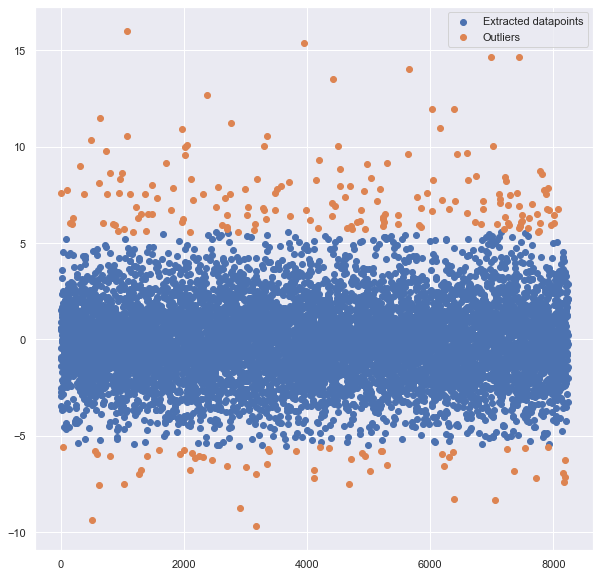

In [349]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 10})

plt.scatter(principal_HAR_scaled.index, principal_HAR_scaled['PC 9'], label="Extracted datapoints")
plt.scatter(Outlier.index, Outlier['PC 9'], label="Outliers")
plt.legend();

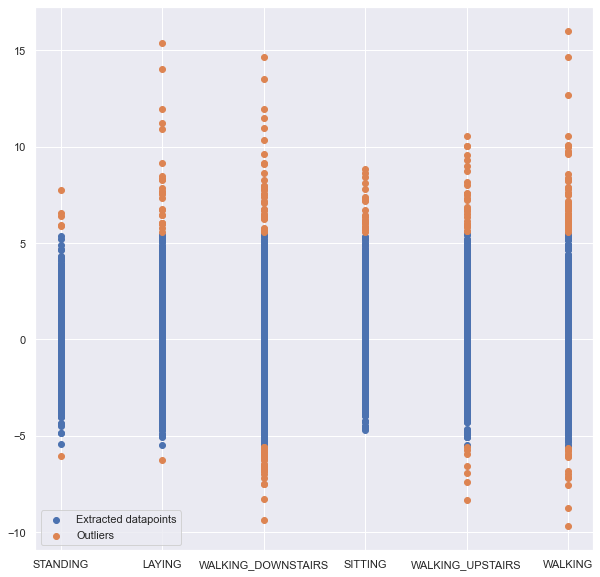

In [350]:
plt.scatter(principal_HAR_scaled['Activity'], principal_HAR_scaled['PC 9'],label="Extracted datapoints")
plt.scatter(Outlier['Activity'], Outlier['PC 9'], label="Outliers")
plt.legend();

In [256]:
df_trainPCA = principal_HAR_scaled.drop(columns = ['Activity'])
df_labelPCA = principal_HAR_scaled.filter(['Activity'])
df_labelPCA

,Activity
0,STANDING
2,LAYING
3,STANDING
4,WALKING_DOWNSTAIRS
5,SITTING
...,...
8234,LAYING
8235,LAYING
8236,STANDING
8237,STANDING


In [257]:
from sklearn.model_selection import train_test_split
f_train3, f_test3, train_label3, test_label3 = train_test_split(df_trainPCA, df_labelPCA, train_size=0.70, random_state= 42, stratify = df_labelPCA)
f_train3


,PC 0,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9
4926,-12.227555,-5.573731,1.186482,-2.322655,4.802982,-2.515930,-2.374585,0.499249,-0.078205,0.636347
6871,9.531027,-1.715497,-5.556791,-1.306717,-1.658276,-2.065832,-1.475882,-0.174917,-1.608920,3.276627
6283,-15.663066,0.687395,2.035012,2.019914,-0.239801,1.257910,-0.701291,1.295294,-0.022156,-0.678684
2982,-16.012123,3.822777,-0.492542,-1.874642,3.128623,1.319396,-0.926887,0.101770,-1.638276,-0.622725
7314,-15.241291,-1.023884,3.977385,7.900832,-3.959059,-0.056468,-4.485414,0.940004,-4.682321,-3.674472
...,...,...,...,...,...,...,...,...,...,...
5180,18.533671,3.939778,2.046880,-1.403956,0.517872,-0.741967,1.981129,-0.444051,-1.230570,0.214340
7088,30.961119,12.261475,6.922668,-4.891106,-3.068965,-9.106063,-2.758988,-1.679940,-3.053695,-0.897209
3589,-16.248486,5.653900,1.264163,4.973450,-5.569584,2.185107,-2.955701,1.752881,-2.391671,-1.122230
1438,-14.293185,3.018256,-2.781672,-3.789733,0.715660,0.224495,1.489697,1.368058,1.709967,1.147595


In [258]:
train_label3


,Activity
4926,STANDING
6871,WALKING
6283,LAYING
2982,STANDING
7314,LAYING
...,...
5180,WALKING_DOWNSTAIRS
7088,WALKING
3589,LAYING
1438,SITTING


## Speedrun with selected classifiers without manual parameter selection

In [259]:

accuracy_scores = np.zeros(3)

# Support Vector Classifier
clf = SVC().fit(f_train3, train_label3.values.ravel())
prediction = clf.predict(f_test3)
accuracy_scores[0] = accuracy_score(test_label3, prediction)*100
print('\033[1m'+'Support Vector Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression(max_iter=10000).fit(f_train3, train_label3.values.ravel())
prediction = clf.predict(f_test3)
accuracy_scores[1] = accuracy_score(test_label3, prediction)*100
print('\033[1m'+'Logistic Regression accuracy:'+'\033[0m','{}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(f_train3, train_label3.values.ravel())
prediction = clf.predict(f_test3)
accuracy_scores[2] = accuracy_score(test_label3, prediction)*100
print('\033[1m'+'K Nearest Neighbors Classifier accuracy:'+'\033[0m','{}%'.format(accuracy_scores[2]))



Support Vector Classifier accuracy: 87.59883478984602%
Logistic Regression accuracy: 86.47523928422804%
K Nearest Neighbors Classifier accuracy: 87.64044943820225%


## SVM with f-score & Confusion matrix

In [343]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC

SVM = SVC()
clf_SVM = SVM.fit(f_train3, train_label3.values.ravel())
SVM_pred = SVM.predict(f_test3)

tbl = np.reshape(SVM_pred, (len(SVM_pred),1))

                
dfSVM = pd.DataFrame(tbl)

y_true = test_label3
y_pred = dfSVM
print(' ------------------------------\n','\033[1m'+'\033[95m'+'Classification Report for SVM\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred))

 ------------------------------
 Classification Report for SVM
 ------------------------------
                    precision    recall  f1-score   support

            LAYING       0.96      0.96      0.96       450
           SITTING       0.80      0.65      0.71       425
          STANDING       0.75      0.88      0.81       452
           WALKING       0.93      0.94      0.94       393
WALKING_DOWNSTAIRS       0.91      0.90      0.91       321
  WALKING_UPSTAIRS       0.93      0.93      0.93       362

          accuracy                           0.88      2403
         macro avg       0.88      0.88      0.88      2403
      weighted avg       0.88      0.88      0.87      2403



                          -------------------------
                          Confusion Matrix for SVM
                          -------------------------


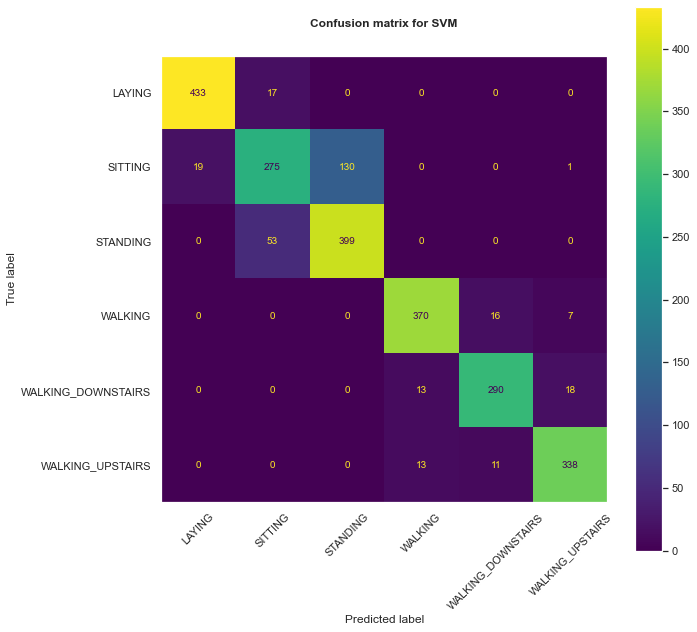

In [351]:
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for SVM\n'+'\033[0m','                         -------------------------')
CM = confusion_matrix(test_label3, SVM_pred, labels=clf_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_SVM.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for SVM',fontweight='bold', y =1.05)
plt.grid(False)

plt.show()

## Logistic Regression with f-score & Confusion matrix

In [298]:
from sklearn.linear_model import LogisticRegression

LOG = LogisticRegression(max_iter=10000)
clf_LOG = LOG.fit(f_train3, train_label3.values.ravel())
LOG_pred = LOG.predict(f_test3)

tbl = np.reshape(LOG_pred, (len(LOG_pred),1))

                
dfLOG = pd.DataFrame(tbl)

y_true = test_label3
y_pred = dfLOG
print(' ------------------------------\n','\033[1m'+'\033[96m'+'Classification Report for LGR\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred))               

 ------------------------------
 Classification Report for LGR
 ------------------------------
                    precision    recall  f1-score   support

            LAYING       0.96      0.98      0.97       450
           SITTING       0.77      0.72      0.74       425
          STANDING       0.78      0.81      0.80       452
           WALKING       0.91      0.92      0.92       393
WALKING_DOWNSTAIRS       0.88      0.87      0.87       321
  WALKING_UPSTAIRS       0.90      0.90      0.90       362

          accuracy                           0.86      2403
         macro avg       0.87      0.87      0.87      2403
      weighted avg       0.86      0.86      0.86      2403



                          -------------------------
                          Confusion Matrix for LGR
                          -------------------------


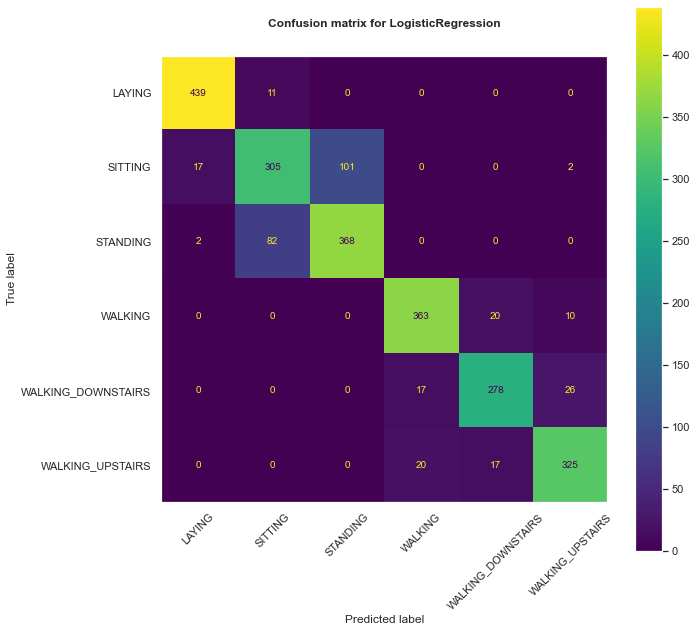

In [291]:
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for LGR\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(test_label3, LOG_pred, labels=clf_LOG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_LOG.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for LogisticRegression',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

## KNN with f-score & Confusion matrix

In [294]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
clf_KNN = KNN.fit(f_train3, train_label3.values.ravel())
KNN_pred = KNN.predict(f_test3)

tbl = np.reshape(KNN_pred, (len(KNN_pred),1))

                
dfKNN = pd.DataFrame(tbl)

y_true = test_label3
y_pred = dfKNN
print(' ------------------------------\n','\033[1m'+'\033[96m'+'Classification Report for KNN\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred))

 ------------------------------
 Classification Report for KNN
 ------------------------------
                    precision    recall  f1-score   support

            LAYING       0.99      0.95      0.97       450
           SITTING       0.72      0.71      0.72       425
          STANDING       0.75      0.78      0.77       452
           WALKING       0.93      0.97      0.95       393
WALKING_DOWNSTAIRS       0.95      0.93      0.94       321
  WALKING_UPSTAIRS       0.96      0.94      0.95       362

          accuracy                           0.88      2403
         macro avg       0.88      0.88      0.88      2403
      weighted avg       0.88      0.88      0.88      2403



                          -------------------------
                          Confusion Matrix for KNN
                          -------------------------


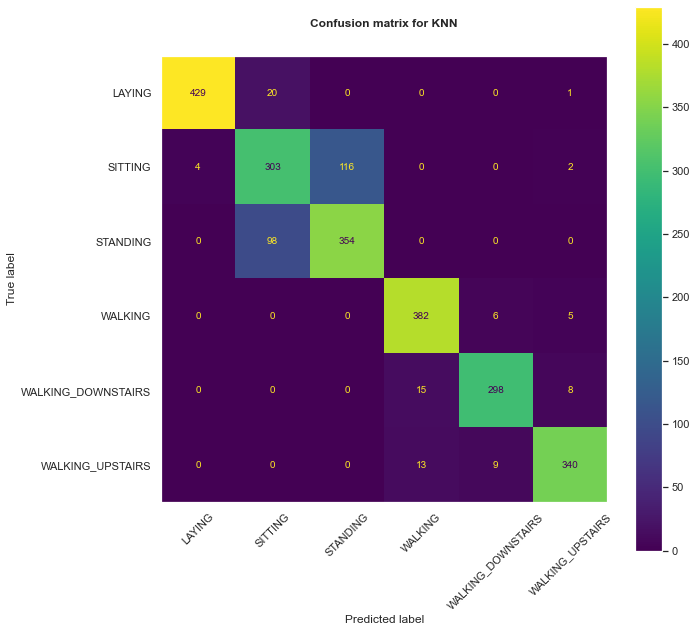

In [295]:
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for KNN\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(test_label3, KNN_pred, labels=clf_KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_KNN.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix for KNN',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

## AdaBoost (with SVM boosting) with f-score & Confusion matrix

In [297]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier(n_estimators=2,base_estimator=SVC(probability=True, kernel='linear'))
clf_ADA = ADA.fit(f_train3, train_label3.values.ravel())
ADA_pred = ADA.predict(f_test3)

tbl = np.reshape(ADA_pred, (len(ADA_pred),1))

                
dfADA = pd.DataFrame(tbl)

y_true = test_label3
y_pred = dfADA
print(' ------------------------------\n','\033[1m'+'\033[96m'+'Classification Report for ADA\n'+'\033[0m','------------------------------')
print(classification_report(y_true, y_pred, zero_division=1))

 ------------------------------
 Classification Report for ADA
 ------------------------------
                    precision    recall  f1-score   support

            LAYING       0.94      0.96      0.95       450
           SITTING       0.82      0.60      0.69       425
          STANDING       0.75      0.91      0.82       452
           WALKING       0.90      0.93      0.91       393
WALKING_DOWNSTAIRS       0.88      0.83      0.86       321
  WALKING_UPSTAIRS       0.88      0.89      0.88       362

          accuracy                           0.86      2403
         macro avg       0.86      0.86      0.85      2403
      weighted avg       0.86      0.86      0.85      2403



                          -------------------------
                          Confusion Matrix for ADA
                          -------------------------


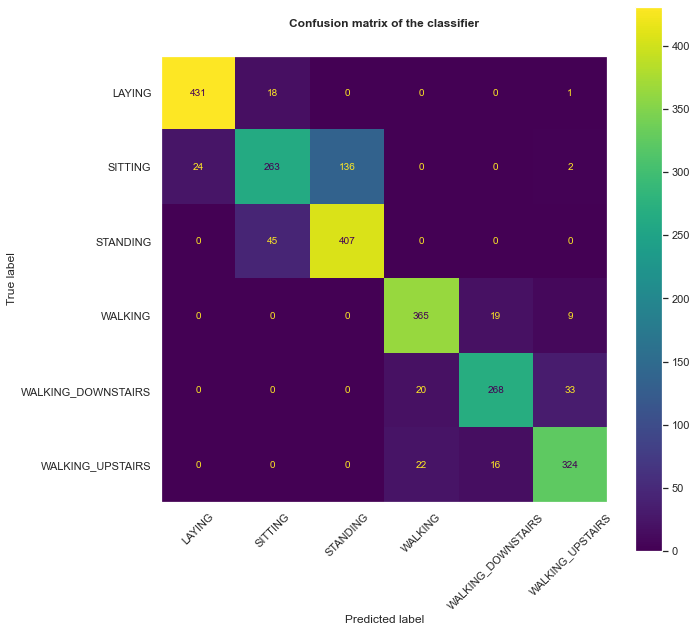

In [296]:
print('                          -------------------------\n','\033[1m'+'\033[96m'+'                         Confusion Matrix for ADA\n'+'\033[0m','                         -------------------------')

CM = confusion_matrix(test_label3, ADA_pred, labels=clf_ADA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=CM,
                              display_labels=clf_ADA.classes_)
disp.plot(xticks_rotation=45)
plt.title('Confusion matrix of the classifier',fontweight='bold', y =1.05)
plt.grid(False)
plt.show()

# Predicting Test data classes

In [300]:
df2

,Serial,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,6597,0.238337,-0.039950,-0.158257,0.283615,0.226575,-0.133216,0.244607,0.213950,-0.168971,...,-0.189878,-0.585136,0.095017,-0.683623,0.936870,-0.635852,-0.749472,0.235484,0.126574,28
1,7609,0.125920,-0.027658,-0.050069,0.082014,0.109970,-0.199439,-0.019578,0.006470,-0.207727,...,-0.204344,-0.648088,0.488927,-0.440765,0.138569,-0.123791,-0.670132,0.303754,-0.081748,2
2,10110,0.281630,-0.012995,-0.082664,-0.993584,-0.924414,-0.916644,-0.994897,-0.919702,-0.910742,...,-0.385800,-0.751006,-0.005078,0.076865,-0.094954,0.661824,-0.847582,0.199450,0.048086,24
3,1924,0.276540,-0.014060,-0.101588,-0.996289,-0.971684,-0.985675,-0.996893,-0.969509,-0.987522,...,-0.256690,-0.716679,0.029915,0.132456,0.599696,0.740406,-0.795674,0.193176,-0.090911,11
4,5088,0.286017,-0.017170,-0.122960,-0.997019,-0.972621,-0.994163,-0.997444,-0.974594,-0.993933,...,-0.628981,-0.854965,0.006138,-0.110332,0.244955,0.227095,-0.636789,0.170850,-0.232221,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,7585,0.316493,-0.042248,-0.112641,-0.417599,-0.062485,-0.456616,-0.442407,-0.105692,-0.451302,...,-0.332931,-0.746567,-0.528114,0.581219,0.661318,0.071269,-0.648784,0.319314,-0.082744,2
2056,8024,0.291166,-0.018297,-0.105985,-0.974934,-0.977835,-0.992603,-0.975536,-0.976748,-0.993596,...,-0.110587,-0.366192,-0.018632,-0.774146,0.690323,-0.148849,0.774865,-0.046804,-0.927630,9
2057,7258,0.288863,-0.021427,-0.101431,-0.990721,-0.993126,-0.990502,-0.991438,-0.992836,-0.989968,...,-0.794075,-0.941084,0.049695,-0.184366,-0.351473,0.213075,0.562080,-0.531512,-0.473734,30
2058,9503,0.312810,-0.048199,-0.098430,-0.298805,-0.253997,-0.274390,-0.364728,-0.236399,-0.305623,...,-0.239798,-0.543402,-0.369172,0.506595,-0.503948,-0.682887,-0.665224,0.264961,0.181816,18


In [301]:
df_test_fin = df2.drop(columns = ['Serial','subject']) # whole training dataset
df_test_fin

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.238337,-0.039950,-0.158257,0.283615,0.226575,-0.133216,0.244607,0.213950,-0.168971,0.623434,...,0.302150,-0.189878,-0.585136,0.095017,-0.683623,0.936870,-0.635852,-0.749472,0.235484,0.126574
1,0.125920,-0.027658,-0.050069,0.082014,0.109970,-0.199439,-0.019578,0.006470,-0.207727,0.595736,...,-0.210348,-0.204344,-0.648088,0.488927,-0.440765,0.138569,-0.123791,-0.670132,0.303754,-0.081748
2,0.281630,-0.012995,-0.082664,-0.993584,-0.924414,-0.916644,-0.994897,-0.919702,-0.910742,-0.935388,...,0.127491,-0.385800,-0.751006,-0.005078,0.076865,-0.094954,0.661824,-0.847582,0.199450,0.048086
3,0.276540,-0.014060,-0.101588,-0.996289,-0.971684,-0.985675,-0.996893,-0.969509,-0.987522,-0.940376,...,-0.458054,-0.256690,-0.716679,0.029915,0.132456,0.599696,0.740406,-0.795674,0.193176,-0.090911
4,0.286017,-0.017170,-0.122960,-0.997019,-0.972621,-0.994163,-0.997444,-0.974594,-0.993933,-0.940728,...,0.282259,-0.628981,-0.854965,0.006138,-0.110332,0.244955,0.227095,-0.636789,0.170850,-0.232221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,0.316493,-0.042248,-0.112641,-0.417599,-0.062485,-0.456616,-0.442407,-0.105692,-0.451302,-0.310365,...,0.126284,-0.332931,-0.746567,-0.528114,0.581219,0.661318,0.071269,-0.648784,0.319314,-0.082744
2056,0.291166,-0.018297,-0.105985,-0.974934,-0.977835,-0.992603,-0.975536,-0.976748,-0.993596,-0.908543,...,0.172421,-0.110587,-0.366192,-0.018632,-0.774146,0.690323,-0.148849,0.774865,-0.046804,-0.927630
2057,0.288863,-0.021427,-0.101431,-0.990721,-0.993126,-0.990502,-0.991438,-0.992836,-0.989968,-0.925886,...,0.533926,-0.794075,-0.941084,0.049695,-0.184366,-0.351473,0.213075,0.562080,-0.531512,-0.473734
2058,0.312810,-0.048199,-0.098430,-0.298805,-0.253997,-0.274390,-0.364728,-0.236399,-0.305623,0.062419,...,0.460652,-0.239798,-0.543402,-0.369172,0.506595,-0.503948,-0.682887,-0.665224,0.264961,0.181816


## Using our best and accurate model SVM

In [352]:

best_model = SVC(C = 50 ,kernel = 'rbf', gamma = 0.001)
clf_SVM = best_model.fit(df_train, df_labels.values.ravel())
SVM_pred_test = best_model.predict(df_test_fin)

SVM_pred_test = pd.DataFrame(SVM_pred_test)
print(SVM_pred_test)

np.savetxt("Amartyaraj_Kumar_test_data_Class_labels.txt", SVM_pred_test, fmt ="%s")



                       0
0     WALKING_DOWNSTAIRS
1     WALKING_DOWNSTAIRS
2               STANDING
3               STANDING
4               STANDING
...                  ...
2055             WALKING
2056              LAYING
2057              LAYING
2058             WALKING
2059             WALKING

[2060 rows x 1 columns]


In [353]:
SVM_pred_test.rename(columns ={0:"A"}, inplace= True)
SVM_pred_test

,A
0,WALKING_DOWNSTAIRS
1,WALKING_DOWNSTAIRS
2,STANDING
3,STANDING
4,STANDING
...,...
2055,WALKING
2056,LAYING
2057,LAYING
2058,WALKING


['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


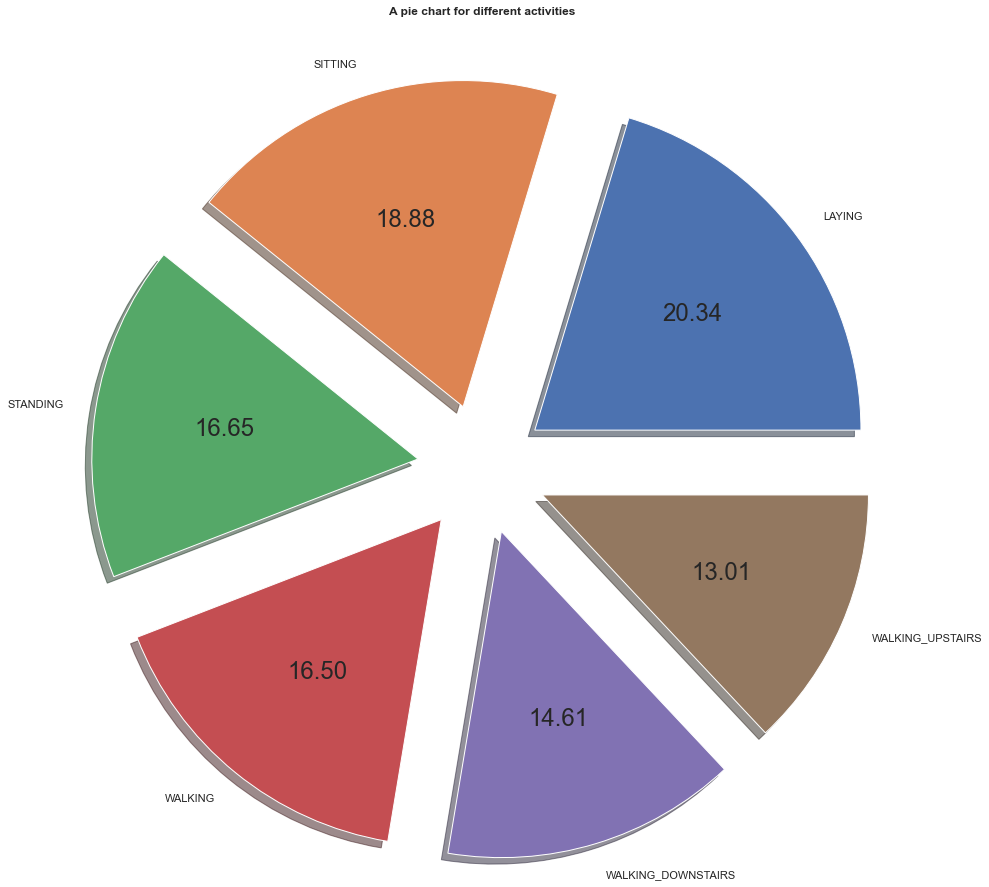

In [354]:
count_of_each_activity = np.array(SVM_pred_test['A'].value_counts())
activities = sorted(SVM_pred_test['A'].unique())
print(activities)

# Plot a pie chart for different activities
plt.rcParams.update({'figure.figsize': [15, 15], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities,explode=[0.2,0.2,0.2,0.2,0.2,0.2],shadow = True, autopct = '%0.2f')
plt.title("A pie chart for different activities", fontweight='bold', y = 1.05);